In [1]:
import pyucalgarysrs
import datetime

In [2]:
srs = pyucalgarysrs.PyUCalgarySRS()
start_dt = datetime.datetime(2020, 3, 21, 6, 30, 0)
end_dt = datetime.datetime(2020, 3, 21, 6, 35, 59)

In [3]:
res = srs.data.download("THEMIS_ASI_RAW", start_dt, end_dt, site_uid="gill")

In [4]:
data = srs.data.read(res.dataset, res.filenames, n_parallel=2)

In [5]:
data.data

array([[[3515, 3498, 3495, ..., 3504, 3493, 3504],
        [3551, 3571, 3537, ..., 3528, 3540, 3554],
        [3530, 3534, 3528, ..., 3530, 3525, 3507],
        ...,
        [3507, 3504, 3495, ..., 3496, 3481, 3489],
        [3501, 3498, 3505, ..., 3508, 3510, 3506],
        [3485, 3498, 3512, ..., 3482, 3501, 3486]],

       [[3496, 3509, 3518, ..., 3464, 3516, 3512],
        [3558, 3523, 3543, ..., 3531, 3545, 3548],
        [3524, 3528, 3552, ..., 3490, 3497, 3553],
        ...,
        [3486, 3491, 3504, ..., 3505, 3489, 3487],
        [3475, 3498, 3503, ..., 3497, 3515, 3487],
        [3521, 3467, 3512, ..., 3504, 3499, 3502]],

       [[3484, 3489, 3511, ..., 3470, 3503, 3525],
        [3528, 3563, 3552, ..., 3510, 3551, 3529],
        [3498, 3503, 3543, ..., 3527, 3515, 3501],
        ...,
        [3502, 3495, 3523, ..., 3487, 3494, 3509],
        [3459, 3518, 3474, ..., 3492, 3472, 3509],
        [3515, 3505, 3479, ..., 3504, 3498, 3473]],

       ...,

       [[3483, 3518, 352

In [6]:
import numpy as np

scale_min = 3000.0  # MUST be a float
scale_max = 14000.0  # MUST be a float

scale_diff = scale_max - scale_min
scale_ratio = 65535.0 / scale_diff
im_scaled = (data.data[:, :, :] - scale_min) * scale_ratio  # apply scale
im_scaled = im_scaled.clip(0, 65535) + 0.5  # limit to 0-65535 (the range of a 16-bit image)
im_scaled = im_scaled.astype(np.uint16)  # convert data type to 16-bit

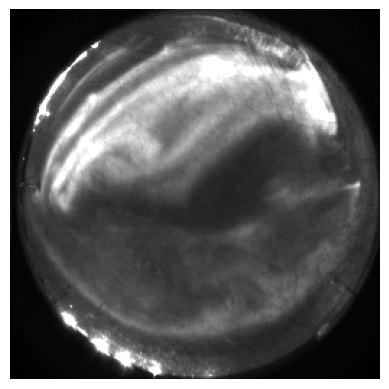

In [7]:
import matplotlib.pyplot as plt

plt.imshow(im_scaled[:, :, 0], origin="lower", cmap="gray")
plt.axis("off")
plt.show()

In [8]:
plt.style.use("dark_background")

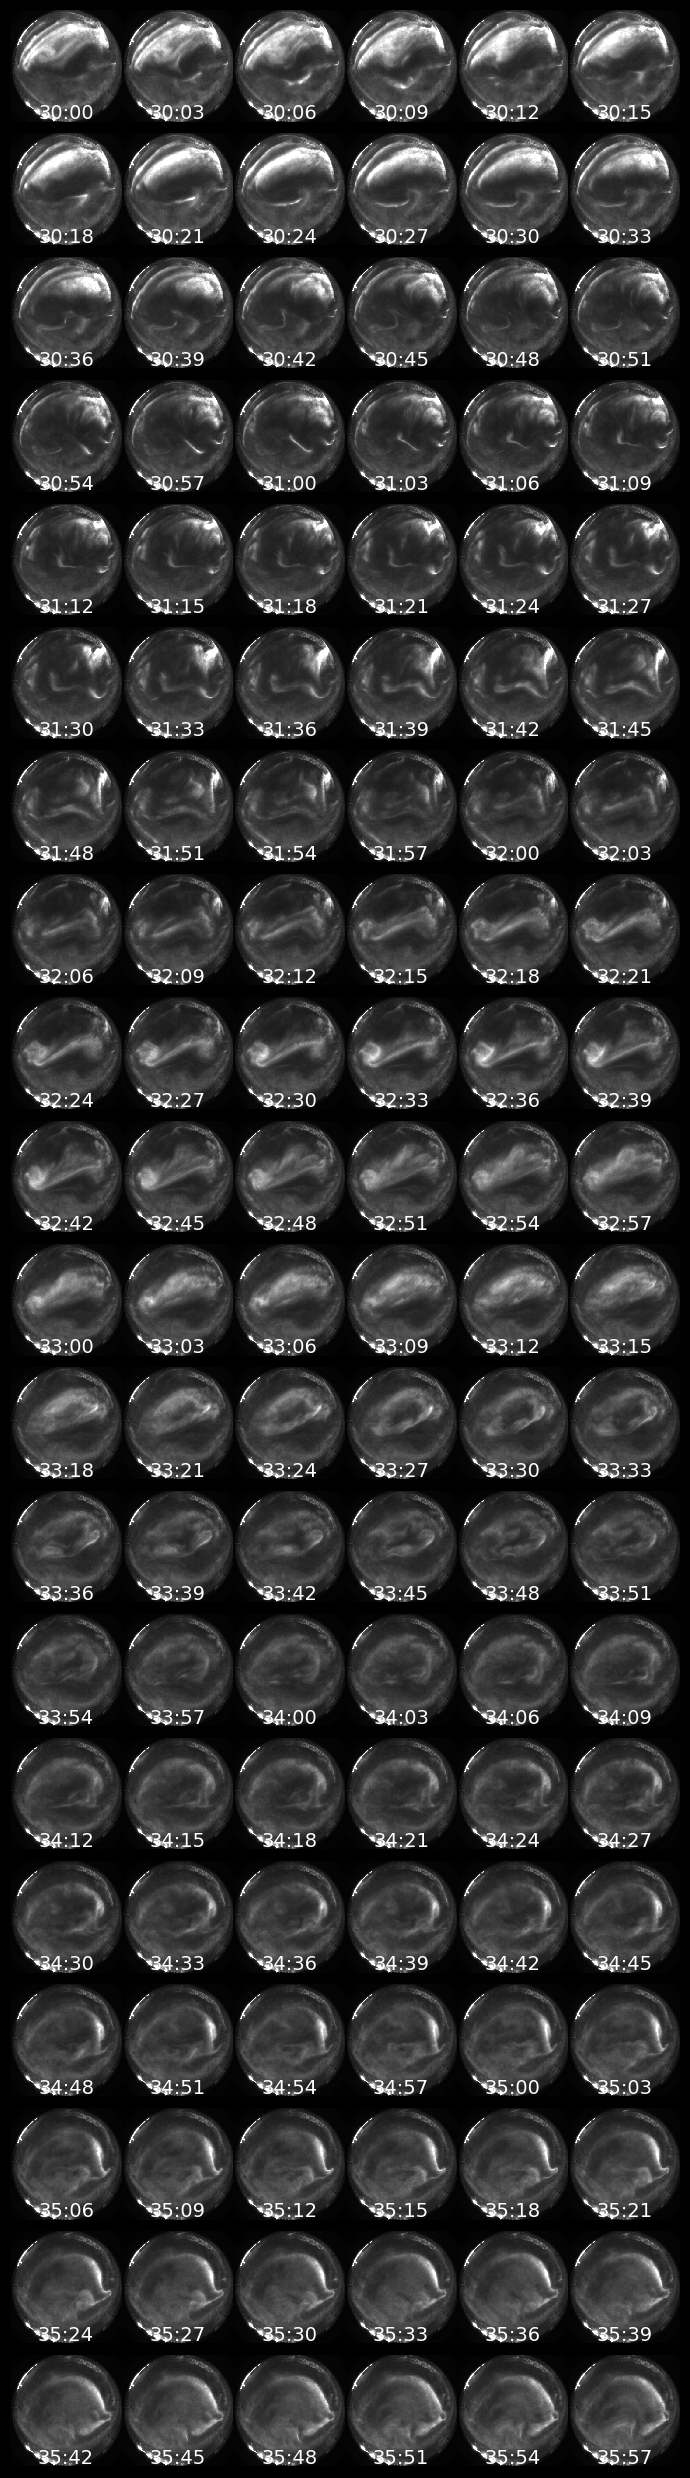

In [9]:
rows = 20
cols = 6
figsize = (7, 25)
timestamps_format = "%M:%S"
timestamps_fontsize = 14
fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=figsize)
for ax, i in zip(axs.flat, range(0, len(data.timestamp))):
    ax.imshow(im_scaled[:, :, i], cmap="grey", origin="lower", interpolation="nearest")
    ax.set_axis_off()

    # show timestamp
    ax.text(
        int(np.floor(im_scaled.shape[1] / 2.)),
        5,
        data.timestamp[i].strftime(timestamps_format),
        ha="center",
        fontsize=timestamps_fontsize,
    )
plt.tight_layout(h_pad=0, w_pad=0)